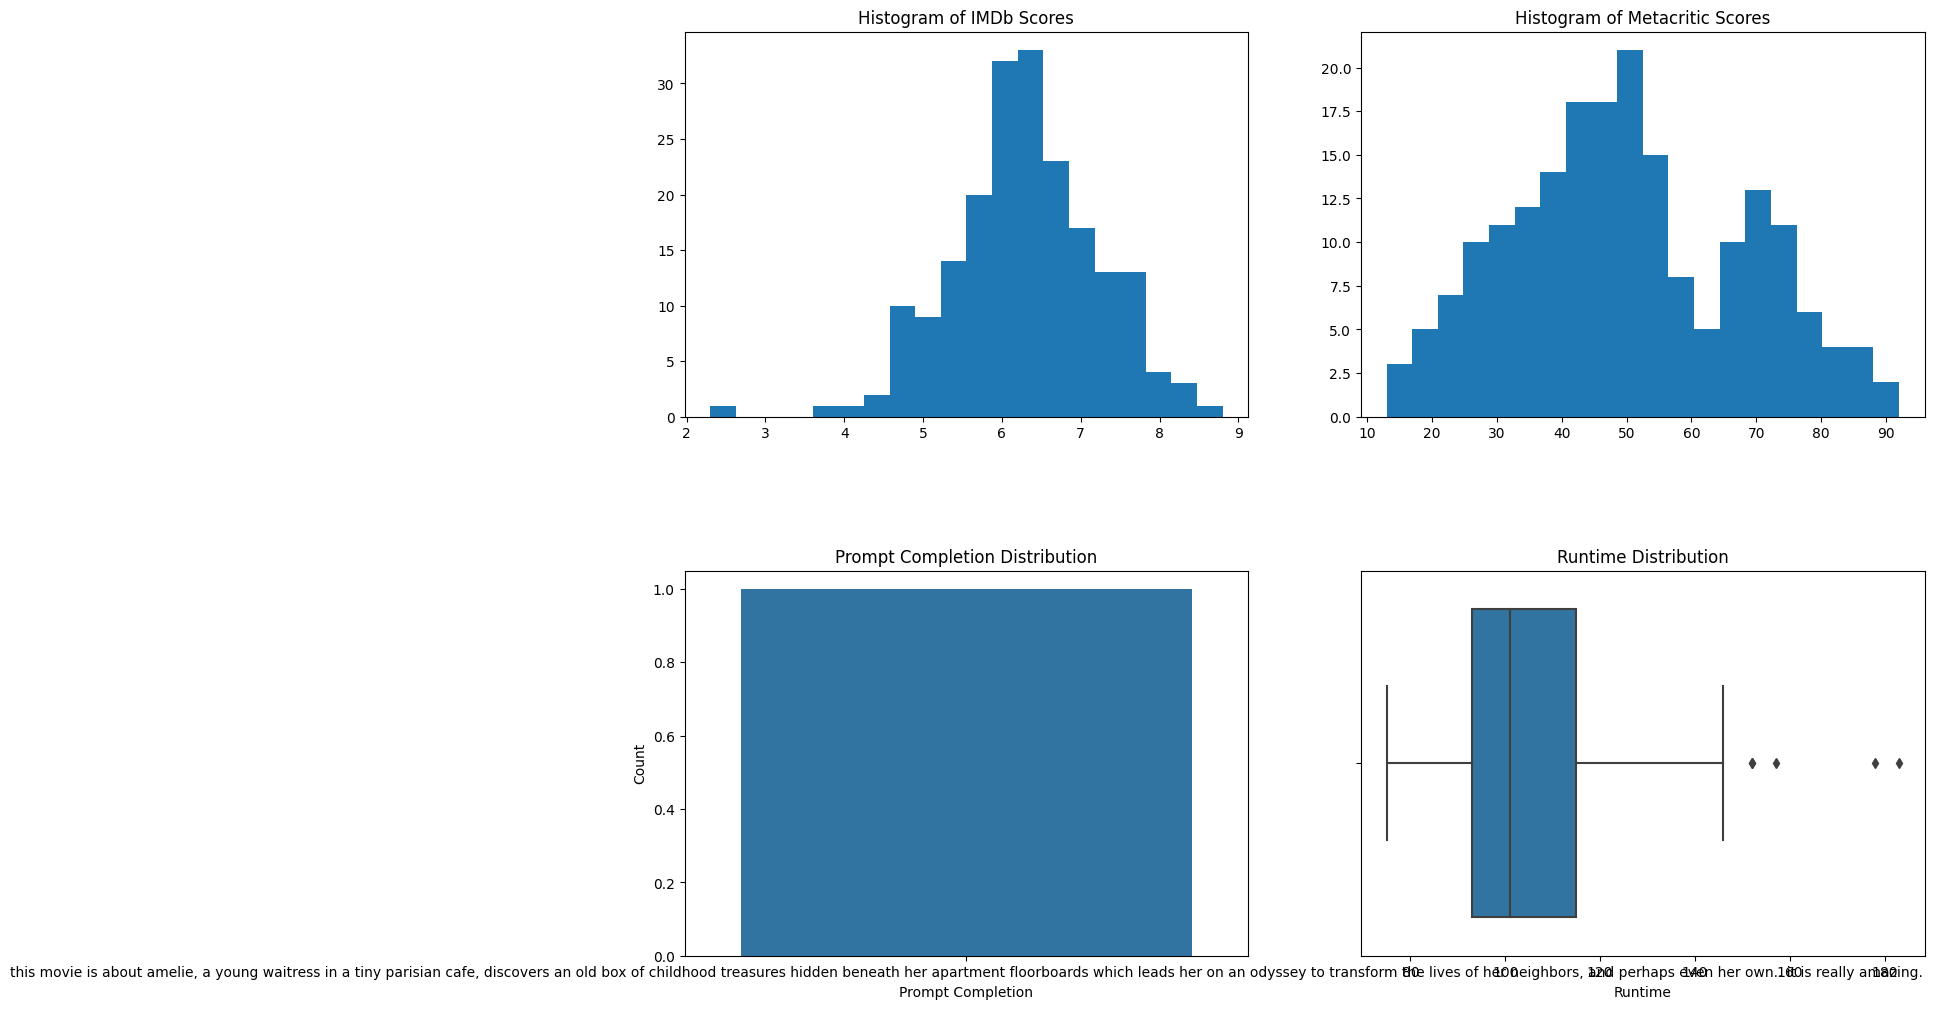

In [20]:
import re
import json 
import pymongo
import pandas as pd
from pymongo import MongoClient
from transformers import DistilBertTokenizer, DistilBertForMaskedLM, pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch MongoDB connection string
with open("/Users/ichiro/Desktop/credentials.json") as f:
    data = json.load(f)

# Retrieve data from MongoDB
client = pymongo.MongoClient(data['mongodb'])
db = client['Mydatabase'] 

# Load data into a DataFrame
df_imdb = pd.DataFrame(list(db['1'].find({'release_date': re.compile('2001')})))
df_metacritic = pd.DataFrame(list(db['2'].find({'release_date': re.compile('2001')})))

# Merge the two datasets
movies = pd.merge(df_imdb, df_metacritic, how="inner", on="title")

# Create a DistilBERT text classification model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForMaskedLM.from_pretrained("distilbert-base-uncased")
fill_mask = pipeline("fill-mask", model=model, tokenizer=tokenizer)

# Generate prompt completions using DistilBERT
def prompt_completion(description):
    result = fill_mask(f'This movie is about {description}. It is really {fill_mask.tokenizer.mask_token}.')
    completed_sentence = result[0]['sequence']
    return completed_sentence

movies['prompt_completion'] = movies['description'].apply(prompt_completion)

# Filter the data
movies_filtered = movies[movies['prompt_completion'].str.contains('amazing')]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Adjust the figure size as needed

# Plot 1: Histogram of IMDb Scores
axes[0, 0].hist(movies['user_rating'], bins=20)
axes[0, 0].set_title("Histogram of IMDb Scores")

# Plot 2: Histogram of Metacritic Scores
axes[0, 1].hist(movies['score'], bins=20)
axes[0, 1].set_title("Histogram of Metacritic Scores")

# Plot 3: Bar plot of prompt completion distribution
bar_plot = sns.barplot(x=movies_filtered['prompt_completion'].value_counts().index,
                       y=movies_filtered['prompt_completion'].value_counts().values,
                       ax=axes[1, 0])
bar_plot.set_title("Prompt Completion Distribution")
bar_plot.set_xlabel("Prompt Completion")
bar_plot.set_ylabel("Count")
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0, ha='center')

# Plot 4: Box plot of runtime
box_plot = sns.boxplot(x=movies['runtime'], ax=axes[1, 1])
box_plot.set_title("Runtime Distribution")
box_plot.set_xlabel("Runtime")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)  # Increase or decrease the spacing between subplots as needed

# Show the plots
plt.show()



# Machine Learning Midterm

**Author: Ichiro Suto**

This Jupyter notebook contains my solution for the Machine Learning Midterm assignment.

---

## Introduction

In this assignment, we retrieve movie data from MongoDB using the PyMongo library and perform a machine learning analysis using DistilBERT. We merge data from two collections, IMDB and Metacritic, based on movie titles. The goal is to generate visualizations that provide insights into the movie data.

---

## Data Retrieval and Preprocessing

First, we fetch the MongoDB connection string from the credentials file. Then, we establish a connection to the MongoDB database and retrieve the movie data from the IMDB and Metacritic collections for a specific year. In this case, we select the year 2001. We create two Pandas dataframes, `df_imdb` and `df_metacritic`, to store the retrieved data.

Next, we merge the two dataframes using the movie titles as the key. The resulting merged dataframe, `movies`, contains the combined information from IMDB and Metacritic for the selected year.

---

## Machine Learning Analysis

For the machine learning analysis, we utilize DistilBERT, a pre-trained transformer model for natural language processing. We create a DistilBERT text classification model using the Hugging Face Transformers library. The model is initialized with the "distilbert-base-uncased" architecture.

To perform the analysis, we generate prompt completions using DistilBERT. We define a function, `prompt_completion()`, that takes a movie description as input and uses the DistilBERT model to complete the prompt. The completed sentences are stored in a new column called `prompt_completion` in the `movies` dataframe.

We then filter the data based on the prompt completions. In this case, we select only the movies where the prompt completion contains the keyword "amazing". The filtered data is stored in a new dataframe called `movies_filtered`.

---

## Data Visualization

To visualize the movie data, we create several plots using the Matplotlib and Seaborn libraries.

1. Histogram of IMDb Scores: We plot a histogram of the IMDb scores from the `movies` dataframe. This histogram provides insights into the distribution of ratings among the movies.

2. Histogram of Metacritic Scores: We plot a histogram of the Metacritic scores from the `movies` dataframe. This histogram helps us understand the distribution of ratings according to Metacritic.

3. Bar Plot of Prompt Completion Distribution: We create a bar plot to visualize the distribution of prompt completions for the filtered movies. This plot shows the different completions generated by DistilBERT and their frequencies.

4. Box Plot of Runtime Distribution: We plot a box plot of the movie runtimes from the `movies` dataframe. This box plot provides information about the spread and central tendencies of the movie durations.

---

## Conclusion

The generated plots provide insights into the movie data based on the machine learning analysis using DistilBERT. Further analysis and interpretation can be performed based on these visualizations. The plots help us understand the distribution of IMDb and Metacritic scores, the distribution of prompt completions, and the distribution of movie runtimes.
